# Competition model with 2 predators - 3 prays using ABMs

simulación de un sistema depredador-presa y más tipos de agentes usando modelos "Agent-based".


In [1]:
# import the libraries

import matplotlib
%matplotlib inline
from pylab import *
import copy as cp

/Users/javiergaleano/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Parameters and initial conditions

num_agents = 5000

#Prays

#Pseudomonas
r_init = int(0.7*num_agents) # initial Pseudomonas population
nr = r_init*2. # carrying capacity of Pseudomonas
mr = 0.03 # magnitude of movement of Pseudomonas
dr = 1.0 # death rate of Pseudomonas when it faces Predators 
rr = 0.3 # reproduction rate of Pseudomonas

#Staphylococcus
ra_init = int(0.2*num_agents) # initial Staphylococcus population
nra = ra_init*2. # carrying capacity of Staphylococcus
dra = 1.0 # death rate of Staphylococcus when it faces Predators 
rra = 0.2 # reproduction rate of Staphylococcus

#Haemophilus
h_init =int(.07*num_agents) # initial Haemophilus population
nh = h_init*2. # carrying capacity of Haemophilus
dh = 1.0 # death rate of Haemophilus when it faces Predators 
rh = 0.2 # reproduction rate of Haemophilus

### Predators

#Bdellovibrio
f_init = int(.02*num_agents) # initial Bdellovibrio population
mf = 0.05 # magnitude of movement of Bdellovibrio
df = 0.05 # death rate of Bdellovibrio when there is no food 
rf = 0.1 # reproduction rate of Bdellovibrio


#Vampirovibrio
w_init = int(.01*num_agents) # initial Vampirovibrio population
mw = 0.05 # magnitude of movement of Vampirovibrio
dw = 0.05 # death rate of Vampirovibrio when there is no food 
rw = 0.1 # reproduction rate of Vampirovibrio


#spatial interaction
cd = 0.02 # radius for collision detection 
cdsq = cd ** 2

print (w_init,f_init,r_init,ra_init,h_init)

(50, 100, 3500, 1000, 350)


In [3]:
# Initialize agent class

class agent:
    pass

def initialize():
    global agents, rdata, radata, hdata, wdata, fdata
    
    agents = []
    rdata = []
    radata = []
    hdata = []
    fdata = []
    wdata = []
    
    for i in xrange(num_agents):
        
        ag = agent()
        
        if i < r_init:
            ag.type = 'r'
        elif r_init <= i < r_init + ra_init:
            ag.type = 'ra'
        elif r_init + ra_init <= i < r_init + ra_init + h_init:
            ag.type = 'h'
        elif r_init + ra_init + h_init <= i < r_init + ra_init + h_init+w_init:
            ag.type = 'w'
        else:
            ag.type = 'f'
        
        ag.x = random()
        ag.y = random()
        agents.append(ag)
        
        

In [4]:
# Plotting functions


# Drawing spatially the predators (in red) and preys (in blue)

def draw_space():
    global agents, rdata, radata, hdata, wdata, fdata
    
    cla()
    
    rabbits = [ag for ag in agents if ag.type == 'r']
    rdata.append(len(rabbits))
    
    if len(rabbits) > 0:
        x = [ag.x for ag in rabbits]
        y = [ag.y for ag in rabbits]
        
        plot(x, y, 'b.')
        
    rats = [ag for ag in agents if ag.type == 'ra']
    radata.append(len(rats))
    
    if len(rats) > 0:
        x = [ag.x for ag in rats]
        y = [ag.y for ag in rats]
        plot(x, y, 'g.')
        
    haemo = [ag for ag in agents if ag.type == 'h']
    hdata.append(len(haemo))
    
    if len(haemo) > 0:
        x = [ag.x for ag in haemo]
        y = [ag.y for ag in haemo]
        plot(x, y, 'c.')
        
    foxes = [ag for ag in agents if ag.type == 'f']
    fdata.append(len(foxes))
    
    if len(foxes) > 0:
        x = [ag.x for ag in foxes]
        y = [ag.y for ag in foxes]
        plot(x, y, 'ro')
        
    wolves = [ag for ag in agents if ag.type == 'w']
    wdata.append(len(wolves))
    
    if len(wolves) > 0:
        x = [ag.x for ag in wolves]
        y = [ag.y for ag in wolves]
        plot(x, y, 'yo')
        
        
    axis('image')
    axis([0, 1, 0, 1])
    
    
# Drawing the time evolutuion od predators and preys

def draw_evol():
    global agents, rdata, radata, hdata, wdata, fdata
    
    rabbits = [ag for ag in agents if ag.type == 'r']
    rdata.append(len(rabbits))
    
    rats = [ag for ag in agents if ag.type == 'ra']
    radata.append(len(rats))
    
    haemo = [ag for ag in agents if ag.type == 'h']
    hdata.append(len(haemo))
    
    foxes = [ag for ag in agents if ag.type == 'f']
    fdata.append(len(foxes))
    
    wolves = [ag for ag in agents if ag.type == 'w']
    wdata.append(len(wolves))
    

    plot(rdata,'b',label = 'Pseudomo')
    plot(radata,'g',label = 'Staphylo')
    plot(hdata,'c',label = 'Haemo')
    plot(fdata,'r',label = 'Bdello')
    plot(wdata,'y',label = 'Vampiro')
    legend()

def draw_evol2():
    global agents, rdata, radata, hdata, wdata, fdata

    plot(rdata,'b',label = 'Pseudomo')
    plot(radata,'g',label = 'Staphylo')
    plot(hdata,'c',label = 'Haemo')
    plot(fdata,'r',label = 'Bdello')
    plot(wdata,'y',label = 'Vampiro')
    legend()

In [5]:
# Updating the interaction of the agents

def update():
    global agents, rdata, radata, hdata, wdata, fdata
    
    if agents == []:
        return
    
    ag = agents[randint(len(agents))]
    
    # simulating random movement
    m = mr if ag.type == 'r' else mf
    
    ag.x += uniform(-m, m)
    ag.y += uniform(-m, m)
    
    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y
    
    # detecting collision and simulating death or birth
    
    
    neighbors_pre = [nb for nb in agents if (nb.type == 'r' or nb.type =='ra'or nb.type =='h')
                 and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cdsq]
    
    
    neighbors_pa = [nb for nb in agents if (nb.type =='f' or nb.type =='w')
                 and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cdsq]
    
    
    if ag.type == 'r':
        
        if len(neighbors_pa) > 0: # if there are foxes nearby
            
            if random() < dr:
                agents.remove(ag)
                return
        if random() < rr*(1-sum(1 for x in agents if x.type == 'r')/nr):
            agents.append(cp.copy(ag))
            
    elif ag.type == 'ra':
        if len(neighbors_pa) > 0: # if there are foxes nearby
            if random() < dra:
                agents.remove(ag)
                return
        if random() < rra*(1-sum(1 for x in agents if x.type == 'ra')/nra):
            agents.append(cp.copy(ag))

    elif ag.type == 'h':
        if len(neighbors_pa) > 0: # if there are foxes nearby
            if random() < dh:
                agents.remove(ag)
                return
        if random() < rh*(1-sum(1 for x in agents if x.type == 'h')/nh):
            agents.append(cp.copy(ag))
                        
            
    elif ag.type == 'w':
        
        if len(neighbors_pre) == 0: # if there are no prays nearby 
            if random() < dw:
                agents.remove(ag)
                return
        else: # if there are rabbits nearby
            if random() < rw:
                agents.append(cp.copy(ag))
        
    else:
        if len(neighbors_pre) == 0: # if there are no prays nearby 
            if random() < df:
                agents.remove(ag)
                return
        else: # if there are rabbits nearby
            if random() < rf:
                agents.append(cp.copy(ag))
                

In [6]:
#updating asynchronous agents

def update_one_unit_time():
    global agents, rdata, radata, hdata, wdata, fdata
    
    if len(agents):
        t = 0.
        while t < 1.:
            t += 1. / len(agents)
            update()
    else:
        return
    
        
# gathering the evolution of the predator-prey's size
        
def evolt():
    global agents, rdata, radata, hdata, wdata, fdata

    
    rabbits = [ag for ag in agents if ag.type == 'r']
    rdata.append(len(rabbits))
    
    rats = [ag for ag in agents if ag.type == 'ra']
    radata.append(len(rats))
    
    haemo = [ag for ag in agents if ag.type == 'h']
    hdata.append(len(haemo))
    
    foxes = [ag for ag in agents if ag.type == 'f']
    fdata.append(len(foxes))
    
    wolves = [ag for ag in agents if ag.type == 'w']
    wdata.append(len(wolves))

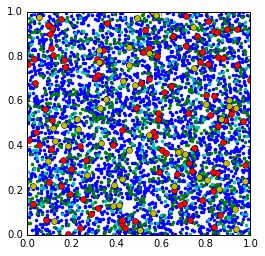

In [10]:
initialize()
draw_space()
show()

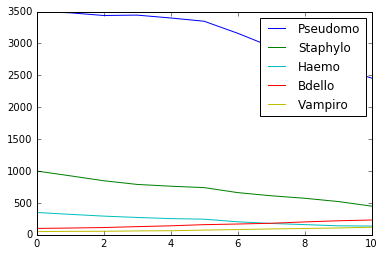

In [11]:
for p in xrange(10):
    update_one_unit_time()
    evolt()
draw_evol2()
#draw_evol()
show()


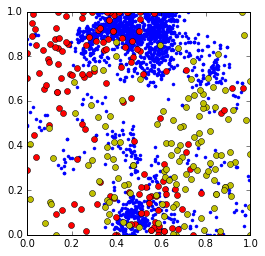

In [107]:
draw_space()
show()